# Final Project Overiew

Welcome to the **Continuous Integration and Continuous Delivery (CI/CD) Final Project** development environment. Now it's time to apply all that you have learned in the previous modules of this course. This lab environment will provide you with a sample application and an OpenShift Cluster, which will enable you to carry out the following objectives:  

* Create a CI pipeline in GitHub Actions with steps for **linting** and **unit testing**.
* Use Tekton to create tasks for **linting**, **unit testing**, and **building an image**.
* Create an OpenShift CI Pipeline that uses the previously created Tekton steps.
* Add the deploy step to the OpenShift pipeline that deploys the code to the lab OpenShift cluster.

You should complete all the work in the final project in this lab environment.

# Grading Criteria Overview

**There are 20 points for 10 tasks in this final project.** Your final assignment will be graded by your peers who are also completing this assignment within the same session. You need to complete the following and submit your responses for peer review. 

1. **Task 1:** Provide the GitHub repo `URL` to which you pushed your changes **(2 pts)**.

2. **Task 2:** Provide the GitHub URL of `.github/workflows/workflow.yml` showing the code snippet for the linting step **(2 pts)**.

3. **Task 3:** Provide the GitHub URL of `.github/workflows/workflow.yml` showing the code snippet for the test step **(2 pts)**.

4. **Task 4:** Provide the GitHub URL of `.tekton/tasks.yml` showing the code snippet for the cleanup task **(2 pts)**.

5. **Task 5:** Provide the GitHub URL of `.tekton/tasks.yml` showing the code snippet for the nose test task **(2 pts)**.

6. **Task 6:** Provide the screenshot showing OpenShift PVC details - `oc-pipelines-console-pvc-details`(.png/jpg) **(2 pts)**.

7. **Task 7:** Provide the screenshot showing GitHub actions running successfully - `cicd-github-validate`(.png/jpg) **(2 pts)**.

8. **Task 8:** Provide the screenshot showing details of the OpenShift Pipeline - `oc-pipelines-oc-final`(.png/jpg) **(2 pts)**.

9. **Task 9:** Provide the screenshot showing details of the OpenShift Pipeline running successfully - `oc-pipelines-oc-green`(.png/jpg) **(2 pts)**.

10.  **Task 10:** Provide the screenshot of the running application logs from OpenShift console - `oc-pipelines-app-logs`(.png/jpg) **(2 pts)**.

# Prerequisite Task

1. If you still need to generate a **GitHub Personal Access Token**, you should do so now.
    * You will need it to push code back to your repository.
    * It should have `repo` and `write` permissions and set to expire in 60 days.
    * When Git prompts you for a password in the Cloud IDE environment, use your Personal Access Token instead.

2. You can recreate this environment by performing **Initialize Development Environment** each time.

3. Create a repository from the GitHub template provided for this lab in the next step.

# Create your own GitHub repository

* You will need your repository to complete the final project.
* We have provided a **GitHub Template** to create your repository in your own GitHub account.
* **Do not Fork the repository as it's already a template**.
* This will avoid confusion when making Pull Requests in the future.

## Your task

1. In a browser, visit this GitHub repository: https://github.com/ibm-developer-skills-network/vselh-ci-cd-final-project-template

2. From the **GitHub Code tab**, use the green **Use this template** to create your repository from this template.

3. Select **Create a new repository** from the dropdown menu. On the next screen, fill out these prompts following the screenshot below:

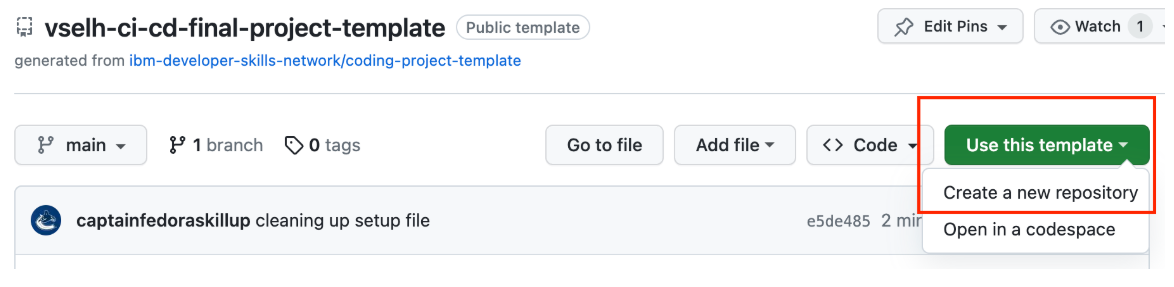

4. Select your GitHub account from the dropdown list.

5. Name the new repository: `ci-cd-final-project`.

6. (Optional) Add a description to let people know what this repo is for.

7. Make the repo **Public** so that others can see it (and grade it).

8. Use the **Create repository from template** to create the repository in your GitHub account.

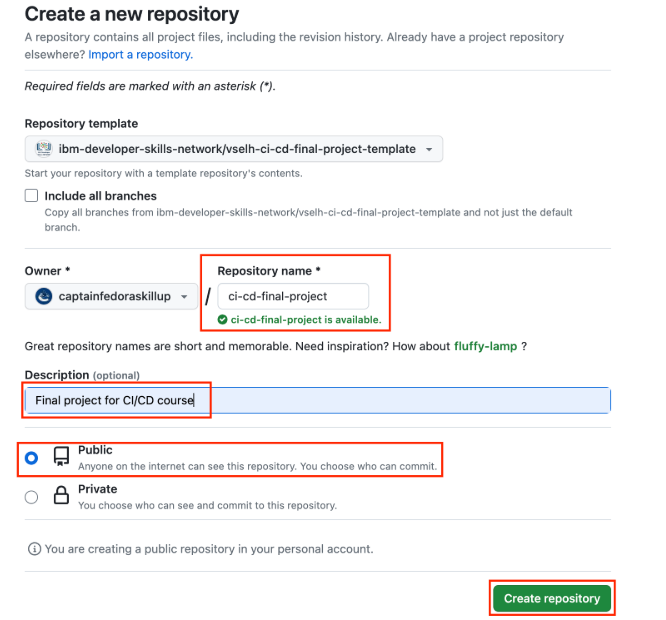

**Note:** 
* These steps only need to be done once.
* Whenever you re-enter this lab, you should start from the next page, **Initialize Development Environment**.

# Initialize Development Environment

As previously covered, the Cloud IDE with OpenShift environment is ephemeral, and may delete at any time. The Cloud IDE with OpenShift environment will create a new environemnt the next time you enter the lab. Unfortunately, you will need to initialize your development environment every time. This shouldn't happen too often as the environment can last for several days at a time, but when it is gone, this is the procedure to recreate it.

## Overview

Each time you need to set up your lab development environment, you will need to run three commands.

Each command will be explained in further detail, one at a time, in the following section.

**`{your_github_account}` represents your GitHub account username.**

The commands include:

```
git clone https://github.com/{your_github_account}/ci-cd-final-project.git
cd ci-cd-final-project
bash ./bin/setup.sh
exit
```

Now, let’s discuss these commands and explain what needs to be done.

## Task details

Initialize your environment using the following steps:

1. Open a terminal with `Terminal` -> `New Terminal` if one isn't open already.

2. Next, use the **`export GITHUB_ACCOUNT=`** command to export an environment variable containing your GitHub account.

> *Note: Substitute your real GitHub account that you used to create the repository for the **`{your_github_account}`** placeholder below:* **`export GITHUB_ACCOUNT={your_github_account}`**

3. Then use the following commands to clone your repository, change it into the `devops-capstone-project` directory, and execute the `./bin/setup.sh` command.

```
git clone https://github.com/$GITHUB_ACCOUNT/ci-cd-final-project.git
cd ci-cd-final-project
bash ./bin/setup.sh
```

You should see the following at the end of the setup execution:

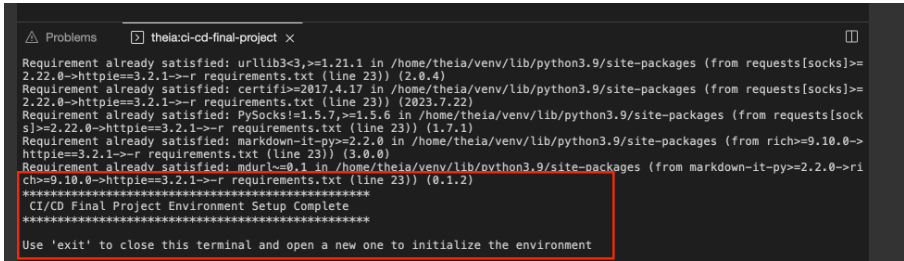

4. Finally, close the current terminal using the **`exit`** command. The environment won't be fully active until you open a new terminal in the next step.

## Validate

In order to validate that your environment is working correctly, you must open a new terminal because the Python virtual environment will only activate when a new terminal is present. You should have ended the previous task using the **`exit`** command to exit the terminal.

Open a terminal with **`Terminal`** -> **`New Terminal`** and check that everything worked correctly by using the **`which python`** command:

Your prompt should look like this:

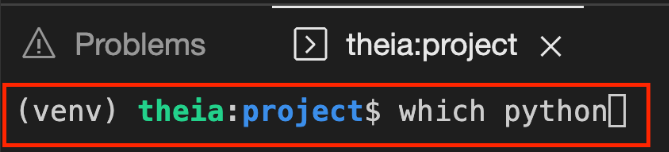

Check which Python you are using: **`which python`**

You should get back:

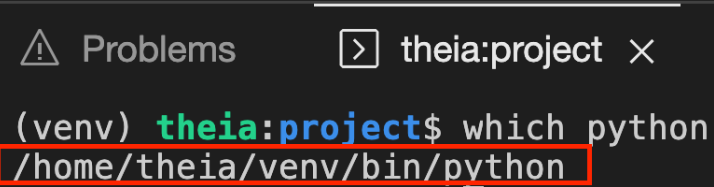

Check the Python version: **`python --version`**

You should get back some patch level of Python 3.8:

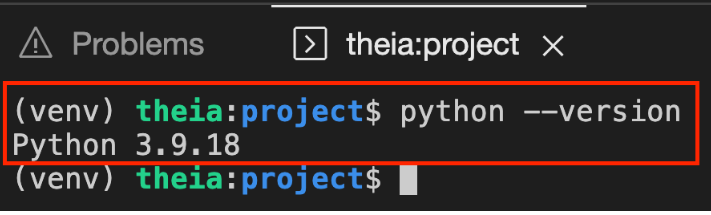

This completes the setup of the development environment.

You are now ready to start working.

# Final project scenario

You’re part of a team responsible for building an innovative microservice, a RESTful API that allows users to manage and track counters. Another team has already developed the user interface (UI) for this microservice, and it's now your turn to ensure the reliability and efficiency of the backend services.

**Continuous Integration (CI) with GitHub Actions**
* Your first task is to set up CI pipelines using GitHub Actions.
* The codebase comes with unit tests for the provided endpoints.
* Your goal is to automate the linting and testing processes.
* You will create a GitHub Actions workflow that triggers whenever changes are pushed to the repository.

**Continuous Deployment (CD) with OpenShift Pipelines**
* In the second phase, establish CD pipelines within OpenShift Pipelines.
* These pipelines should include linting, testing, building an image, and the seamlessly deploying the microservice to an OpenShift cluster.

You need to provide the URL for your repository with the GitHub workflow and tekton yaml files in addition to other screenshots as evidence of your work. Your evidence will be essential for peer project evaluation. Best of luck with your project!

# Exercise 1: Create basic workflow

* Your GitHub repository has an empty workflow file **`.github/workflows/workflow.yml`**. 
* You will create the CI workflow by writing several steps in this workflow file.

## Your task

Open the **`.github/workflows/workflow.yml`** file and add the following:

1. name: `CI workflow`
2. workflow triggers: `push on main branch` and `pull_request on main branch`
3. Jobs
    * runs-on: `ubuntu-latest`
    * container: `python:3.9-slim`
4. Checkout step:
    * name: `Checkout`
    * uses: `actions/checkout@v3`
5. Install Dependencies step:
    * name: `Install dependencies`
    * run `python -m pip install --upgrade pip` and `pip install -r requirements.txt` commands

You can also refer to the videos and labs in the module 2 of the course in case you want to familiarize yourself with the concepts before proceeding further.

## Solution

```
name: CI workflow

on:
  push:
    branches: main
  pull_request:
    branches: main

jobs:
  build:
    runs-on: ubuntu-latest
    container: python:3.9-slim
    steps:
      - name: Checkout
        uses: actions/checkout@v3
      - name: Install dependencies
        run: |
        python -m pip install --upgrade pip
        pip install -r requirements.txt
```

# Exercise 2: Add the linting step to CI workflow

* Next, you will add the `Lint` step to the GitHub workflow. 
* You will use `Flake8` module for linting.
* Open the `.github/workflows/workflow.yml` file and complete the following tasks.

## Your task

Add a linting task with the following details:

1. name: `Lint with flake8`

2. commands:
    * `flake8 service --count --select=E9,F63,F7,F82 --show-source --statistics`
    * `flake8 service --count --max-complexity=10 --max-line-length=127 --statistics`

You can refer to the videos and labs in the module 2 for help.

## Solution

```
    - name: Lint with flake8
    run: |
      flake8 service --count --select=E9,F63,F7,F82 --show-source --statistics
      flake8 service --count --max-complexity=10 --max-line-length=127 --statistics
```

# Exercise 3: Add the test step to CI workflow

* Next, you will add the `Test` step to the GitHub workflow.
* You will use the `Nose` module for running the tests.
* Open the `.github/workflows/workflow.yml` file and complete the following tasks.

## Your task

Add a test step with the following details:

1. name: `Run unit tests with nose`
2. command:
    * `nosetests -v --with-spec --spec-color --with-coverage --cover-package=app`

You can refer to the videos and labs in the module 2 for help.

## Solution

```
    - name: Run unit tests with nose
      run: nosetests -v --with-spec --spec-color --with-coverage --cover-package=app
```

# Step 4: Push CI code to GitHub

* To test the workflow and the CI pipeline, you need to commit the changes and push your branch back to the GitHub repository.
* As described earlier, each new push to the `main` branch should trigger the workflow.

## Your task

1. Configure the Git account with your email and name using the `git config --global user.email` and `git config --global user.name` commands.

```
git config --global user.email "you@example.com"
git config --global user.name "Your Name"
```

2. The next step is to stage all the changes you made in the previous exercises and push them to your forked repo on GitHub.

```
git add -A
git commit -m "COMMIT MESSAGE"
git push
```


# Exercise 5: Validate GitHub Actions Workflow

**To validate that your workflow ran and was successful, simply go to your version of the repository on GitHub and click on Actions.**

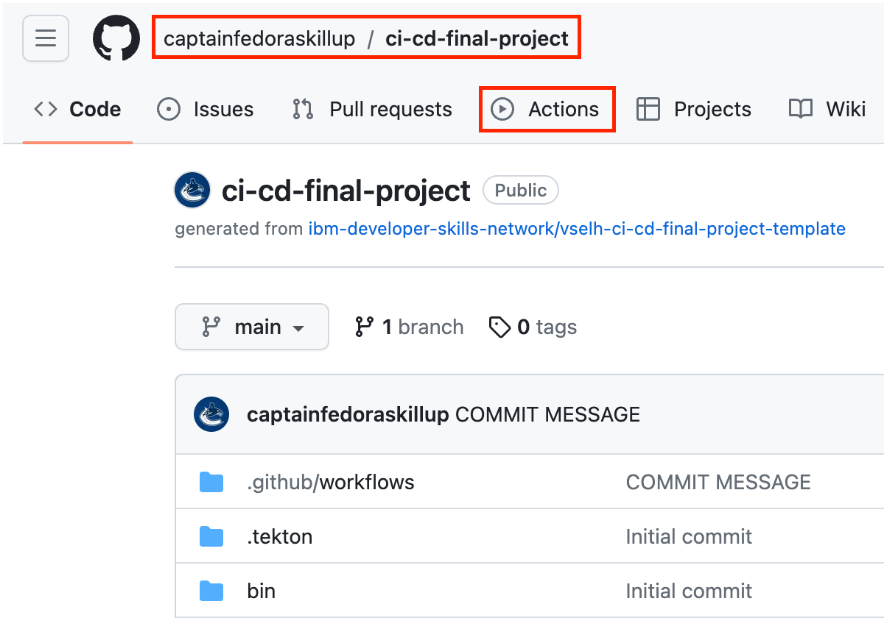

**You can click on the `CI Workflow` to see more details.**

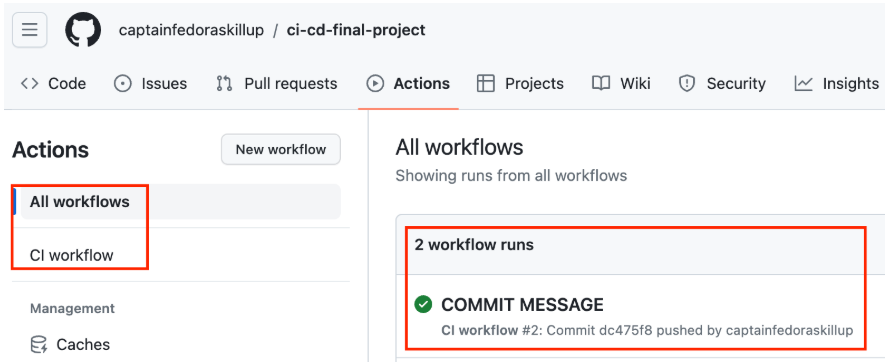

Finally, you can drill into the action to confirm all the steps succeeded. 

Take a screenshot as follows and name the file **`cicd-github-validate`(.png/jpg)**.

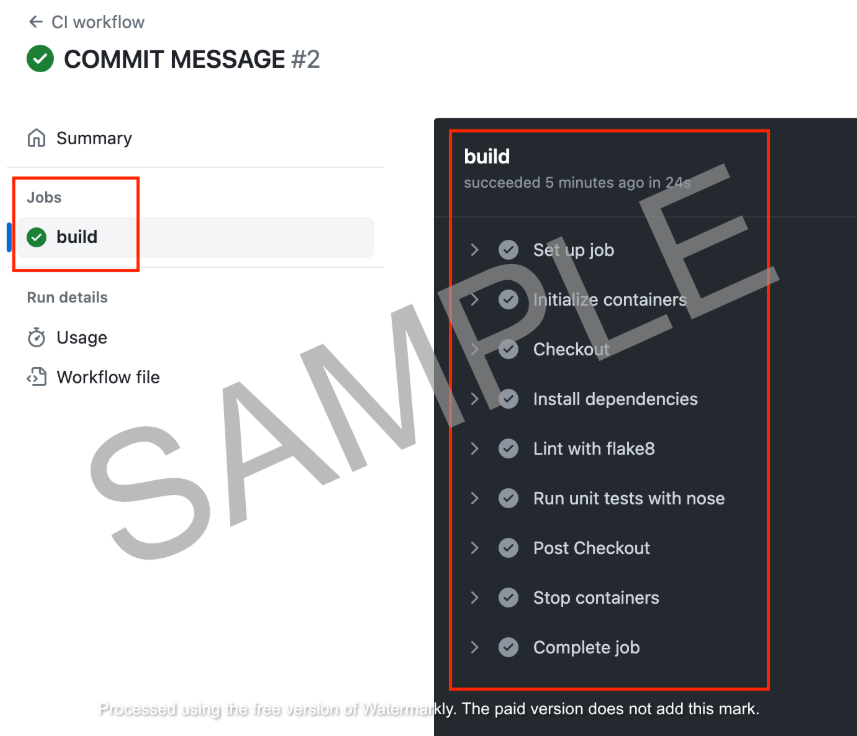

# Exercise 6: Create cleanup Tekton task

Congratulations on successfully creating the GitHub CI workflow to checkout, lint, and test your code. The next step is to create the CD workflow in OpenShift. Before you can do that, create the cleanup task that will clean the output workspace so that the CD pipeline can start fresh.

Open the `.tekton/tasks.yml` file and complete the following tasks.

## Your task

Add a cleanup task with the following details:

1. apiVersion: `tekton.dev/v1beta1`
2. kind: `Task`
3. name: `cleanup`
4. spec.workspaces.name: `source`

This task will have a single step called `remove` as follows:

1. name: `remove`
2. image: `alpine:3`
3. env:
    * name: `WORKSPACE_SOURCE_PATH`
    * value: `$(workspaces.source.path)`
4. workingDir: `$(workspaces.source.path)`
5. securityContext
    * runAsNonRoot: `false`
    * runAsUser: `0`
6. script:

```
#!/usr/bin/env sh
    set -eu
    echo "Removing all files from ${WORKSPACE_SOURCE_PATH} ..."
    # Delete any existing contents of the directory if it exists.
    #
    # We don't just "rm -rf ${WORKSPACE_SOURCE_PATH}" because ${WORKSPACE_SOURCE_PATH} might be "/"
    # or the root of a mounted volume.
    if [ -d "${WORKSPACE_SOURCE_PATH}" ] ; then
      # Delete non-hidden files and directories
      rm -rf "${WORKSPACE_SOURCE_PATH:?}"/*
      # Delete files and directories starting with . but excluding ..
      rm -rf "${WORKSPACE_SOURCE_PATH}"/.[!.]*
      # Delete files and directories starting with .. plus any other character
      rm -rf "${WORKSPACE_SOURCE_PATH}"/..?*
    fi
```

## Solution

```
---
apiVersion: tekton.dev/v1beta1
kind: Task
metadata:
  name: cleanup
spec:
  description: This task will clean up a workspace by deleting all the files.
  workspaces:
    - name: source
  steps:
    - name: remove
      image: alpine:3
      env:
        - name: WORKSPACE_SOURCE_PATH
          value: $(workspaces.source.path)
      workingDir: $(workspaces.source.path)
      securityContext:
        runAsNonRoot: false
        runAsUser: 0
      script: |
        #!/usr/bin/env sh
        set -eu
        echo "Removing all files from ${WORKSPACE_SOURCE_PATH} ..."
        # Delete any existing contents of the directory if it exists.
        #
        # We don't just "rm -rf ${WORKSPACE_SOURCE_PATH}" because ${WORKSPACE_SOURCE_PATH} might be "/"
        # or the root of a mounted volume.
        if [ -d "${WORKSPACE_SOURCE_PATH}" ] ; then
          # Delete non-hidden files and directories
          rm -rf "${WORKSPACE_SOURCE_PATH:?}"/*
          # Delete files and directories starting with . but excluding ..
          rm -rf "${WORKSPACE_SOURCE_PATH}"/.[!.]*
          # Delete files and directories starting with .. plus any other character
          rm -rf "${WORKSPACE_SOURCE_PATH}"/..?*
        fi
```

# Exercise 7: Create test Tekton task

* You have added the `cleanup` task to the tekton file. 
* Next, add the test task called `nose` right under the `cleanup` task.
* Open the `.tekton/tasks.yml` file and complete the following tasks.


## Your Task

Add a testing task with the following details:

1. apiVersion: `tekton.dev/v1beta1`
2. kind: `Task`
3. name: `nose`
4. spec.workspaces.name: `source`
5. params:
    * name: `args`
    * description: `Arguments to pass to nose`
    * type: `string`
    * default: `"-v"`

This task will have a single step called `nosetests` as follows:
1. name: `nosetests`
2. image: `python:3.9-slim`
3. workingDir: `$(workspaces.source.path)`
4. script:

```
  #!/bin/bash
  set -e
  python -m pip install --upgrade pip wheel
  pip install -r requirements.txt
  nosetests $(params.args)
```


## Solution

```
---
apiVersion: tekton.dev/v1beta1
kind: Task
metadata:
  name: nose
spec:
  workspaces:
    - name: source
  params:
    - name: args
      description: Arguments to pass to nose
      type: string
      default: "-v"
  steps:
    - name: nosetests
      image: python:3.9-slim
      workingDir: $(workspaces.source.path)
      script: |
          #!/bin/bash
          set -e
          python -m pip install --upgrade pip wheel
          pip install -r requirements.txt
          nosetests $(params.args)
```

# Step 8: Push CI code to GitHub

As before, you will need to push your tekton code to GitHub so your peers can evaluate your submission.

## Your task

1. Configure the Git account with your email and name using the `git config --global user.email` and `git config --global user.name` commands.

```
git config --global user.email "you@example.com"
git config --global user.name "Your Name"
```

2. The next step is to stage all the changes you made in the previous exercises and push them to your forked repo on GitHub.

```
git add -A
git commit -m "COMMIT MESSAGE"
git push
```


# Exercise 9: Create OpenShift pipeline

You are almost done with the final project. Now that you have the tasks created, you will need to:
* Install the tasks in the lab OpenShift cluster
* Create CD pipeline

**Please follow the porcess mentioned in the Hands-on Lab: CI/CD with OpenShift Pipelines for doing the below tasks.**

## Your task

1. In the terminal, install the **`cleanup`** and **`nose`** tasks by applying the **`tasks.yml`** file with **`kubectl apply -f .tekton/tasks.yml`** command.

2. Open the OpenShift console from the lab environment.

3. Create a PVC from the **`Administrator`** perspective with
    * storageclass: **`skills-network-learner`**
    * select a PVC: **`oc-lab-pvc`**
    * size: **`1GB`**

4. Create a new pipeline and a workspace called `output`

5. Add the following steps in this order:
    * cleanup
    * git clone
    * flake8 linting
    * nose tests
    * buildah task

6. Test the pipeline works. Take a screenshot as described in this exercise's **Solutions** section.

7. Add the final step of deploying the application to the lab openshift cluster using the **OpenShift client task** and the **`oc deploy`** command.
* **`oc create deployment $(params.app-name) --image=$(params.build-image) --dry-run=client -o yaml | oc apply -f -`**

## Hint

The PVC opions should look as follows:

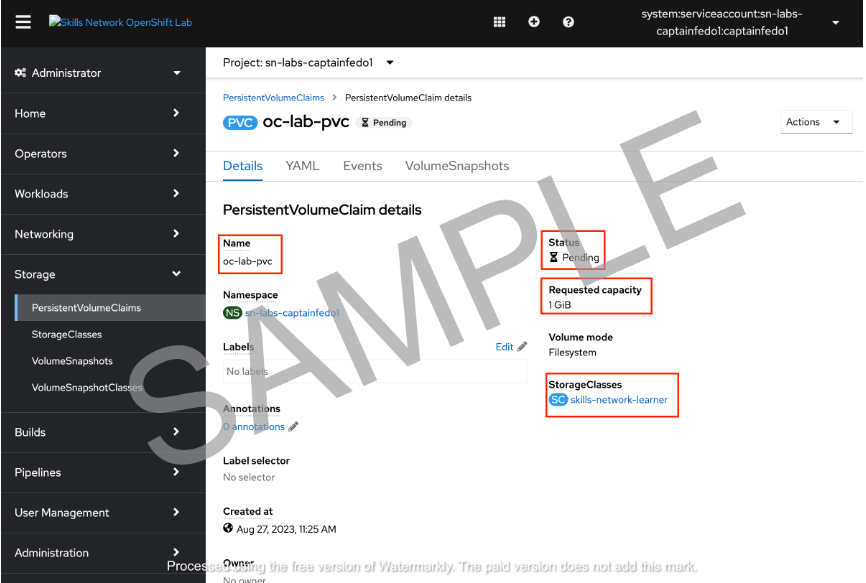

At the end of this exercise, you can validate the solution as follows:

## Solution

1. **Confirm the pipeline has the following steps:**

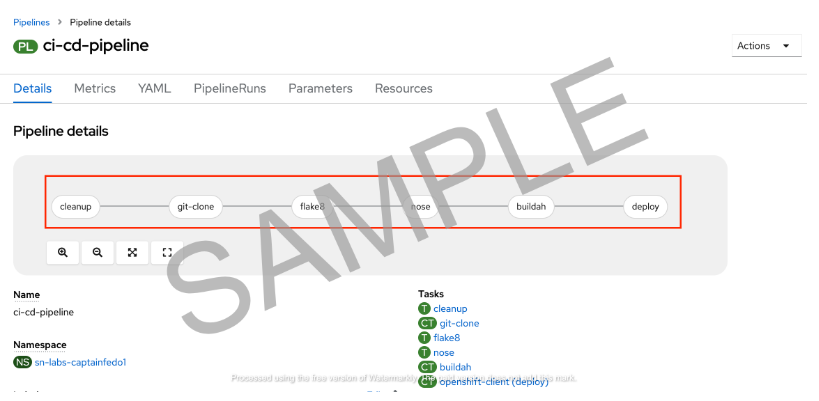

2. **Confirm the pipeline runs as shown:**

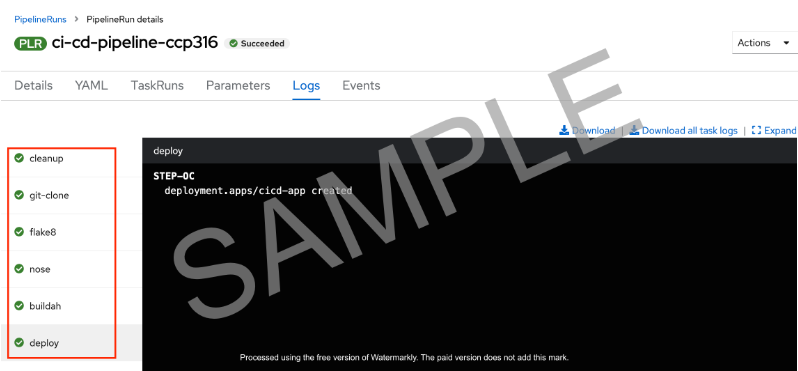

3. **Confirm you can see the application logs in the OpenShift console:**

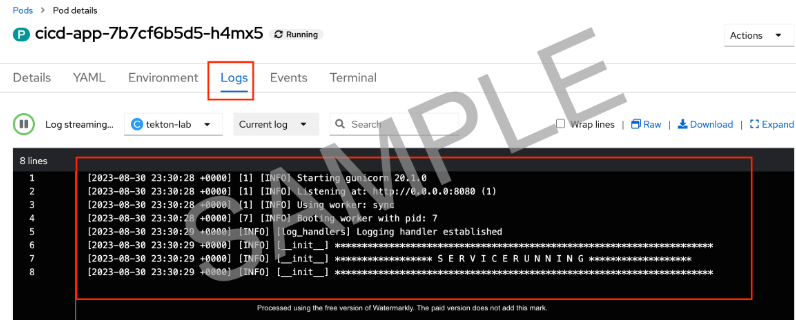


# Submission

## Commit the code to your Github repository

* Use `git status` to ensure that you have committed your changes locally in the development environment.
* Use the `git add` command to update the staging area's code.
* Commit your changes using `git commit -m <commit message>`
* Push your local changes to a remote branch using the `git push` command

> Note: Use your **GitHub Personal Access Token** as your password in the Cloud IDE environment. You may also need to configure Git the first time you use it with:
```
git config --local user.email "you@example.com"
git config --local user.name "Your Name"
```

Submit the link to your GitHub repository when completed.

## Evaluation

1. The GitHub repo URL that you pushed your changes to. Should be of the format **`https://github.com/{your_github_account}/ci-cd-final-project.git`**
2. Provide the GitHub URL of the **`.github/workflows/workflow.yml`** file showing the code snippet for the **`linting`** step.
3. Provide the GitHub URL of the **`.github/workflows/workflow.yml`** file showing the code snippet for the **`test`** step.
4. Provide the GitHub URL of the **`.tekton/tasks.yml`** file showing the code snippet for the **`cleanup`** task.
5. Provide the GitHub URL of the **`.tekton/tasks.yml`** file showing the code snippet for the **`nosetests`** task.
6. Screenshot showing OpenShift PVC details. Name this file **`oc-pipelines-console-pvc-details`(.png/jpg)**
7. Screenshot showing GitHub actions running successfully. Name this file **`cicd-github-validate`(.png/jpg)**
8. Screenshot showing details of the OpenShift Pipeline. Name this file **`oc-pipelines-oc-final`(.png/jpg)**
9. Screenshot showing details of the OpenShift Pipeline running successfully. Name this file **`oc-pipelines-oc-green`(.png/jpg)**
10. Screenshot of the running application logs from OpenShift console. Name this file **`oc-pipelines-app-logs`(.png/jpg)**

## Sample Files for Tasks 6-10

### Task 6: `oc-pipelines-console-pvc-details`(.png/jpg)

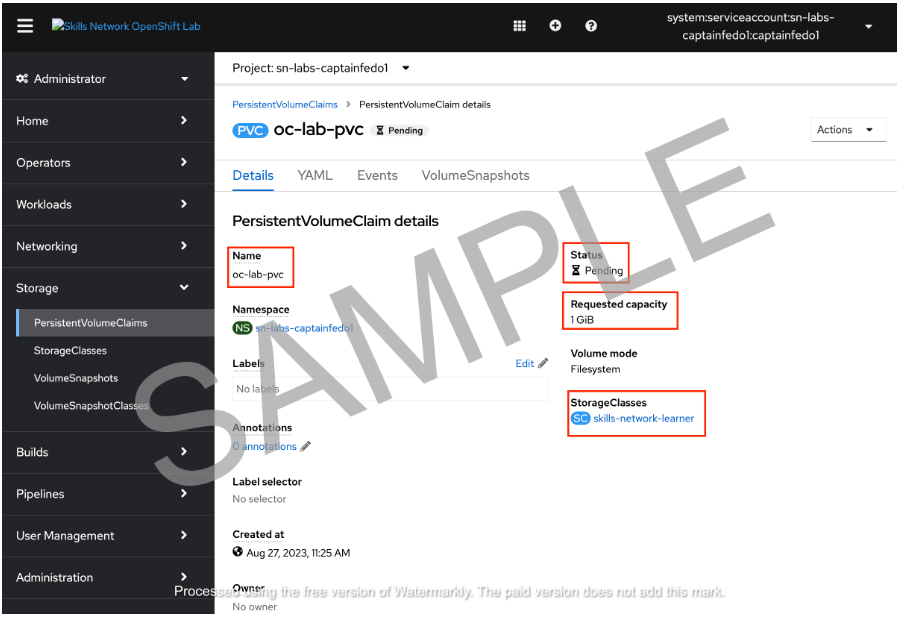

### Task 7: `cicd-github-validate`(.png/jpg)

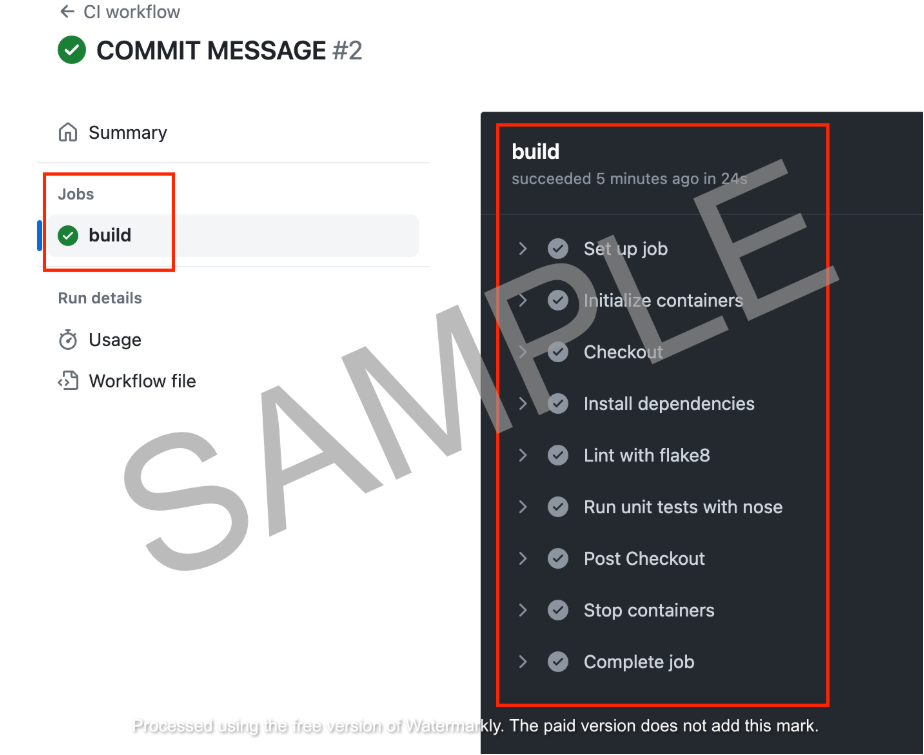

### Task 8: `oc-pipelines-oc-final`(.png/jpg)

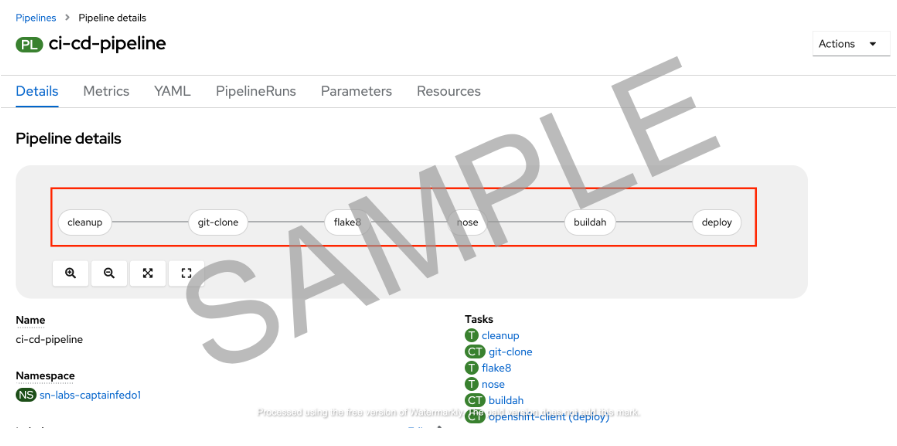

### Task 9: `oc-pipelines-oc-green`(.png/jpg)

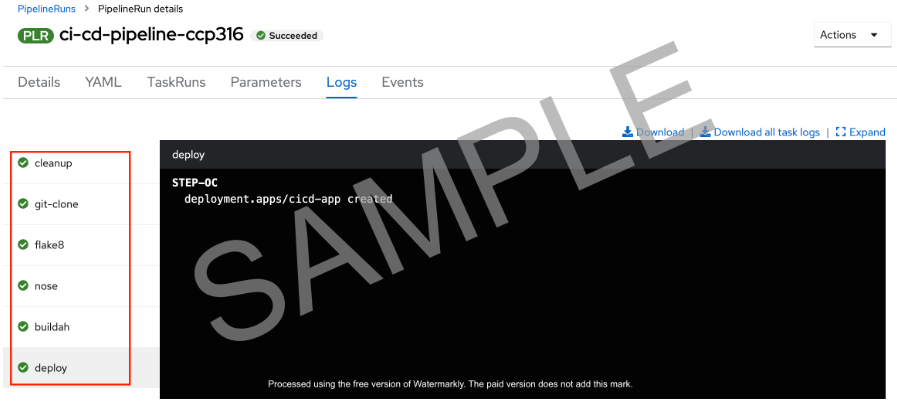

### Task 10: `oc-pipelines-app-logs`(.png/jpg)

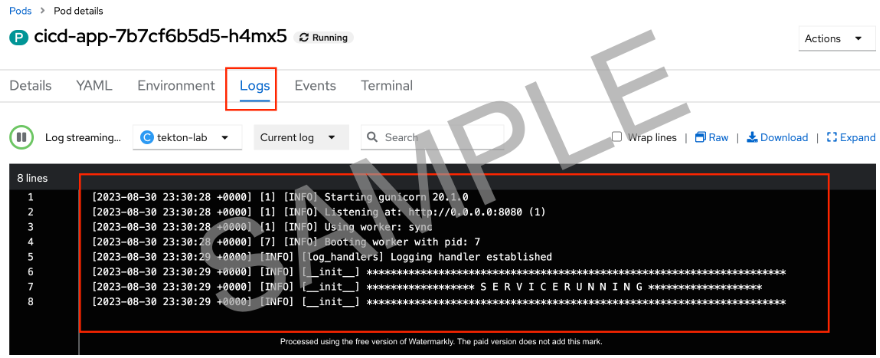

# Conclusion

Congratulations on completing the CI/CD Final Project. Now you understand how to create continuous integration and continous deployment pipelines with best practices in mind.